In [1]:
#-*-coding:UTF-8 -*-
# 作者：张云涛 S322517454
# 创建：2022-09-10
# 更新：2022-09-10
# 文件：linear_regression.ipynb
# 线性回归
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline

Method 1: 
$ \theta = \sum_{i=1}^{n}(y_i - a - bx_i)$  
Method 2:
$ J(X)={(AX-b)}^T{(AX-b)}$ 

In [2]:
class SimpleLinearRegression:
    """线性回归"""
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        self.w = 0
        self.b = 1
        return
    
    def calculate1(self):
        """计算w, b"""
        x_mean = np.mean(self.x_data)
        y_mean = np.mean(self.y_data)
        x_r = self.x_data - x_mean
        y_r = self.y_data - y_mean
        w = np.sum(x_r * y_r) / np.sum(x_r * x_r)
        b = y_mean - w * x_mean
        return w, b
    
    def calculate2(self):
        """计算w, b"""
        X0 = np.append(np.ones(self.x_data.size), self.x_data)
        X1 = X0.reshape([2, self.x_data.size])
        X = X1.T
        m1 = np.dot(X.T, X)
        m1 = m1.astype(np.float32)
        m2 = np.linalg.inv(m1)
        m3 = np.dot(m2, X.T)
        m4 = np.dot(m3, self.y_data.T)
        w = m4[1]
        b = m4[0]
        return w, b 


In [3]:
# 加载数据
df = pd.read_excel("月广告费与月销售量数据.xlsx", sheet_name="Sheet1", header=None)
print(df.values)
ad_fee = np.append(df.values[1][1:], df.values[4][1:])
print("广告费: ", ad_fee)
sales_volume = np.append(df.values[2][1:], df.values[5][1:])
print("销售量: ", sales_volume)

[['i(月份)' 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0]
 ['Si(月广告费 万元)' 10.95 12.14 13.22 13.87 15.06 16.3 17.01 17.93 19.01
  20.01]
 ['ti(月销售量 万件)' 11.18 10.43 12.36 14.15 15.73 16.4 18.86 16.13 18.21
  18.37]
 ['i(月份)' 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0]
 ['Si(月广告费 万元)' 21.04 22.1 23.17 24.07 25.0 25.95 27.1 28.01 29.06 30.05]
 ['ti(月销售量 万件)' 22.61 19.83 22.67 22.7 25.16 25.55 28.21 28.12 28.32
  29.18]]
广告费:  [10.95 12.14 13.22 13.87 15.06 16.3 17.01 17.93 19.01 20.01 21.04 22.1
 23.17 24.07 25.0 25.95 27.1 28.01 29.06 30.05]
销售量:  [11.18 10.43 12.36 14.15 15.73 16.4 18.86 16.13 18.21 18.37 22.61 19.83
 22.67 22.7 25.16 25.55 28.21 28.12 28.32 29.18]


In [4]:
# 计算线性回归方程
lr = SimpleLinearRegression(ad_fee, sales_volume)
w1, b1 = lr.calculate1()
w2, b2 = lr.calculate2()
print("w1 = {0}, b1 = {1}".format(w1, b1))
print("w2 = {0}, b2 = {1}".format(w2, b2))

w1 = 0.9939783163480108, b1 = -0.22023934674248835
w2 = 0.9939775168969763, b2 = -0.22021998646335295


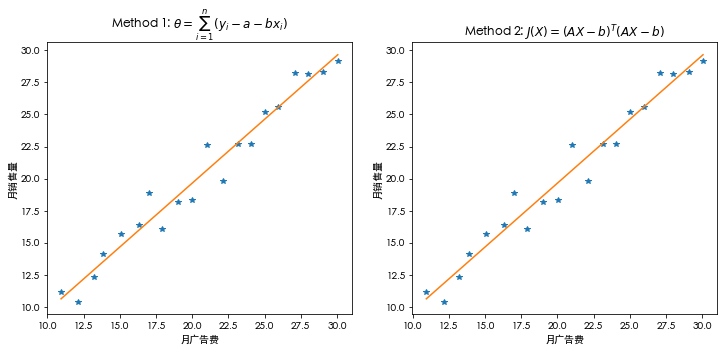

回归方程 y1 = (0.9939783163480108) * x + (-0.22023934674248835)
回归方程 y2 = (0.9939775168969763) * x + (-0.22021998646335295)


In [5]:
matplotlib.rcParams['font.family'] = ['Heiti TC']
# 绘制线性回归方程
plt.figure(2, figsize=(12, 5))
plt.subplot(121)
plt.title(r"Method 1: $\theta = \sum_{i=1}^{n}(y_i - a - bx_i)$")
plt.xlabel('月广告费')
plt.ylabel('月销售量')
plt.plot(ad_fee, sales_volume, '*')
plt.plot(ad_fee, ad_fee*w1+b1)

plt.subplot(122)
plt.title(r"Method 2: $J(X)={(AX-b)}^T{(AX-b)}$")
plt.xlabel('月广告费')
plt.ylabel('月销售量')
plt.plot(ad_fee, sales_volume, '*')
plt.plot(ad_fee, ad_fee*w2+b2)
plt.show()
print("回归方程 y1 = ({w1}) * x + ({b1})".format(w1=w1, b1=b1))
print("回归方程 y2 = ({w2}) * x + ({b2})".format(w2=w2, b2=b2))